# **DATA SCIENCE PROJECT**

## **URL BASED PHISHING WEBSITE DETECTION USING MACHINE LEARNING** 


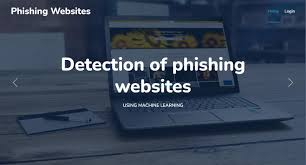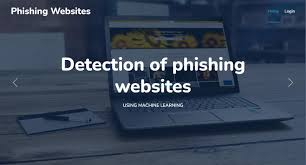



## **TASK: BINARY CLASSFICATION**

## **INTRODUCTION**: 

## **BUSINESS CASE: PREDCIT THE WEBSITE URL IT IS FAKE OR SAFE**

The Internet has become an indispensable part of our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

## **PYTHON IMPLEMENTATION** 

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

### **LOAD THE DATASET**

In [2]:
#Loading data into dataframe
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## **ABOUT DATASET**
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

* The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

* A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

* The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

## **DOMAIN ANALYSIS**

**1.UsingIP**: Check if the URL contains an IP address instead of a domain name. Phishing sites often use IP addresses to disguise their true identity.

**2.LongURL**: Longer URLs might be associated with phishing sites. Phishers sometimes use long, convoluted URLs to obfuscate the true destination.

**3.ShortURL**: The presence of shortened URLs might indicate phishing. Shortened URLs can hide the true destination, which may be used by phishers.

**4.Symbol@**: Check for the presence of '@' symbols in the domain name. Legitimate domain names typically do not contain '@' symbols, so their presence may indicate phishing.


**5.Redirecting//**: Look for multiple consecutive forward slashes ('//') in the URL, which could indicate redirection. Phishing sites often use redirection to mimic legitimate websites.

**6.PrefixSuffix**:  Analyze whether the domain name contains prefixes or suffixes (e.g., hyphens) that are commonly associated with phishing sites.

**7.SubDomains**: Check the number of subdomains in the URL. Phishing sites may use numerous subdomains to mimic legitimate domains or to create a false sense of security.

**8.HTTPS**:  Determine the prevalence of HTTPS in URLs. Legitimate websites increasingly use HTTPS for secure communication, so the absence of HTTPS may indicate a potential phishing site.

**9.DomainRegLen**: Investigate the length of time since domain registration. Phishing sites may use newly registered domains to avoid detection.


**10.UsingPopupWindow**: The presence of popup windows might indicate phishing attempts.

**11.IframeRedirection**: Check if the website uses iframe redirection, which can be a technique used in phishing.

**12.AgeofDomain**: Analyze the age of the domain. Phishing sites may frequently use newly registered domains.

**13.DNSRecording**: Check for DNS recording. Phishing sites may not have proper DNS records.

**14.WebsiteTraffic**: Higher website traffic might indicate a legitimate website, but this feature alone may not be conclusive.

**15.PageRank**: Analyze the PageRank of the website. Higher PageRank might indicate legitimacy, but it can be manipulated.

**16.GoogleIndex**: Check if the website is indexed by Google. Lack of indexing might indicate a new or suspicious website.

**17.LinksPointingToPage**:  The number of links pointing to the page might indicate legitimacy if coming from reputable sources.

**18.StatsReport**: The presence of statistical reports might indicate a legitimate website.

**19.Class**: The "class" feature likely represents the target variable in your dataset, indicating whether each entry is classified as a phishing website or a legitimate one.

## **BASIC CHECKS**

In [3]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
#Identify the columns or features
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
# Checking the data type of each feature
data.dtypes

Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [6]:
# All the features are of integer type.

In [7]:
#Checking the tail part pf the dataframe
data.tail() 

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,11053,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [9]:
# Reset the index
data.reset_index(drop=True, inplace=True)

# Now, drop the index column
data_cleaned = data.copy()


In [10]:
# No null values present

In [11]:
#checking for NaN values
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [12]:
# There is no missing values

In [13]:
data.value_counts().sum()

11054

In [14]:
data.shape #The dataset  consists of 11054 rows and 32 features. 

(11054, 32)

In [15]:
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print(data['class'].value_counts())
# data is imbalanced.

class
 1    6157
-1    4897
Name: count, dtype: int64


In [17]:
unique_classes = data['class'].unique()
print(unique_classes)


[-1  1]


In [18]:
#Checking for unique values

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

## **EXPLORATORY DATA ANALYSIS**
### **Univariate analysis**

In [19]:
import sweetviz as sv 

my_report = sv.analyze(data)

my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**STATISTICAL REPORT FOR NUMEARICAL COLUMNS**

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


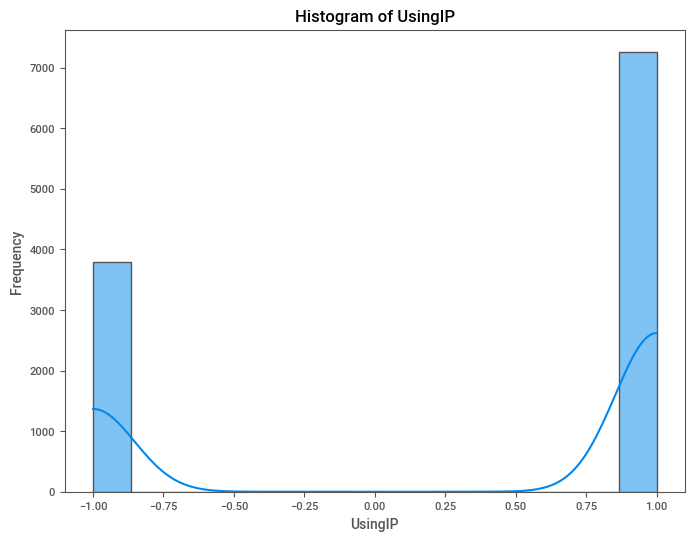

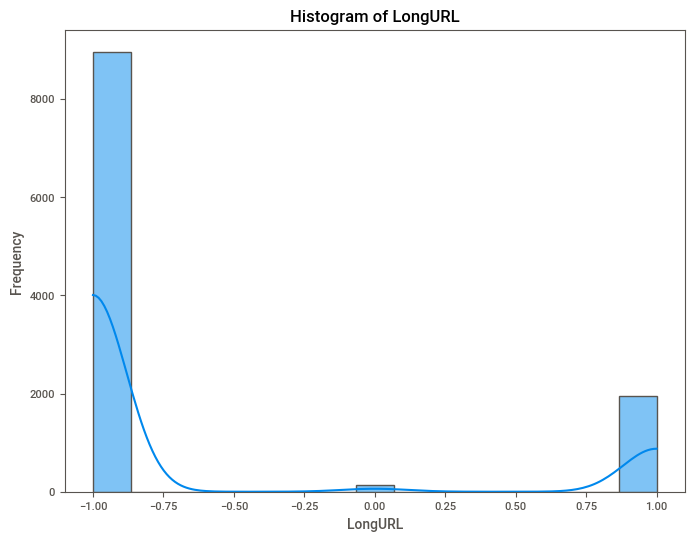

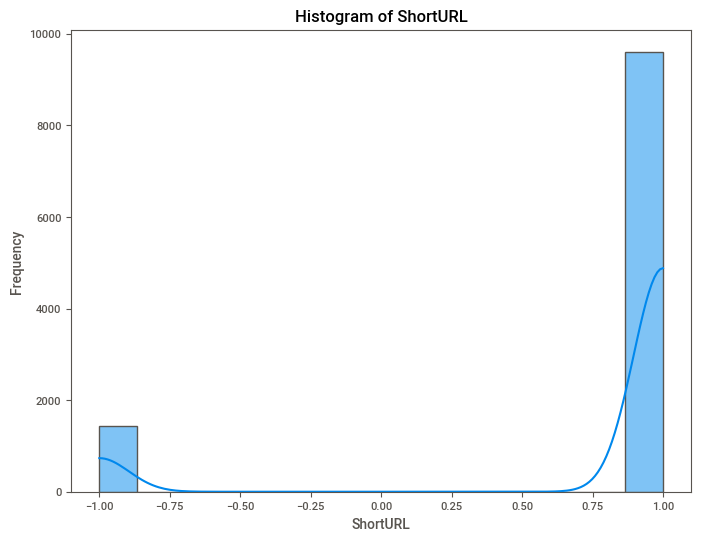

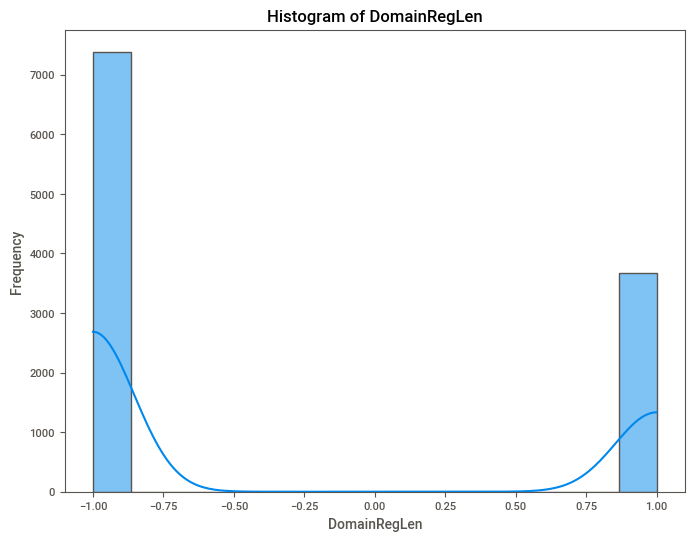

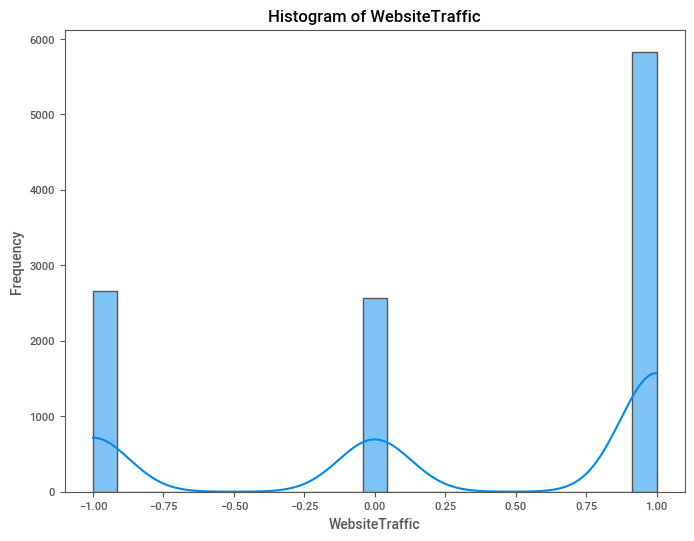

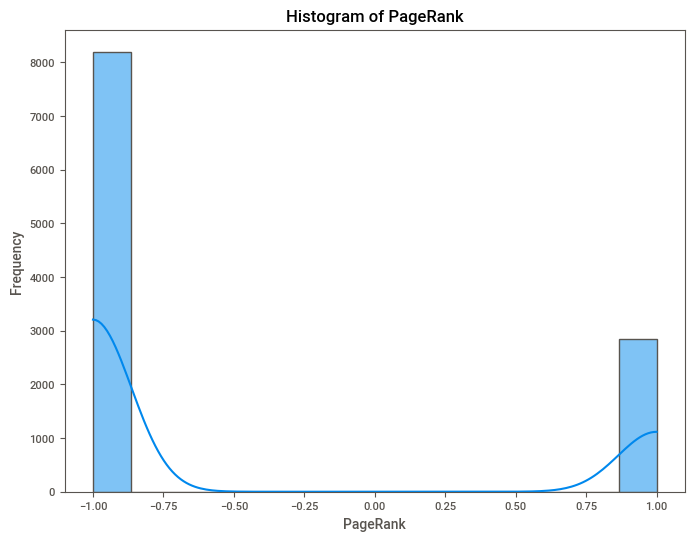

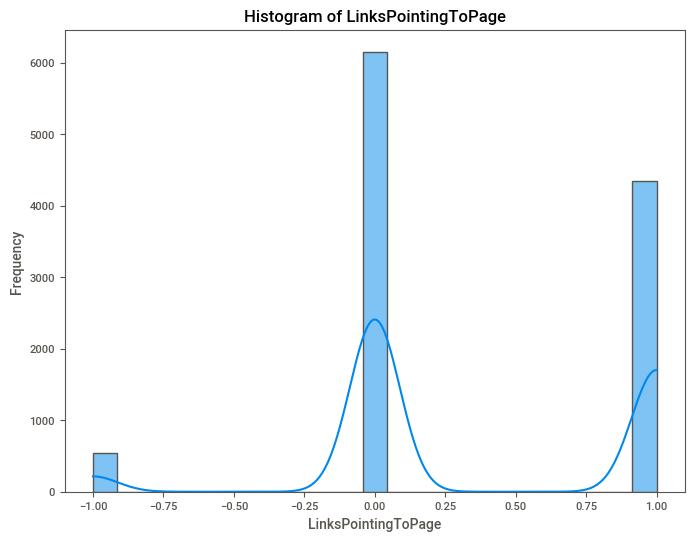

In [24]:
# Histograms and Density Plots for numerical features
numerical_features = ['UsingIP', 'LongURL', 'ShortURL', 'DomainRegLen', 'WebsiteTraffic', 'PageRank', 'LinksPointingToPage']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**UsingIP:**

* The distribution appears to be bimodal, indicating that there may be two distinct groups or patterns present in the data.
* One peak is observed at a lower value, suggesting that a significant portion of the data has a lower frequency of using IP addresses.
* Another peak is observed at a higher value, indicating another group with a higher frequency of using IP addresses.

ode of the distribution.

**LongURL:**

* The distribution is skewed to the right, indicating that the majority of the data contains longer URL lengths

* There are a few instances of extremely long URLs, which are represented by the long tail on the right side of the distribution.



**ShortURL:**

* The distribution is heavily skewed to the right, suggesting that the majority of URLs in the dataset are relatively short.
* This could indicate a common pattern among URLs, with only a few outliers having longer lengths.

**DomainRegLen:**

* The distribution appears to be approximately normal, with a slight skewness to the right.
* Most domain registration lengths fall within a certain range, with fewer instances of longer registration lengths.

**WebsiteTraffic:**

* The distribution is heavily skewed to the right, indicating that the majority of websites in the dataset have relatively low traffic.
* There are a few websites with significantly higher traffic levels, represented by the long tail on the right side of the distribution.

**PageRank**:

* The distribution is heavily skewed to the right, indicating that the majority of pages have relatively low PageRank values.
* There are a few pages with significantly higher PageRank values, represented by the long tail on the right side of the distribution.

**LinksPointingToPage:**

* The distribution is skewed to the right, indicating that the majority of pages have a relatively low number of incoming links.
* There are a few pages with a significantly higher number of incoming links, represented by the long tail on the right side of the distribution.

In [26]:
data['class'] = data['class'].astype(str)


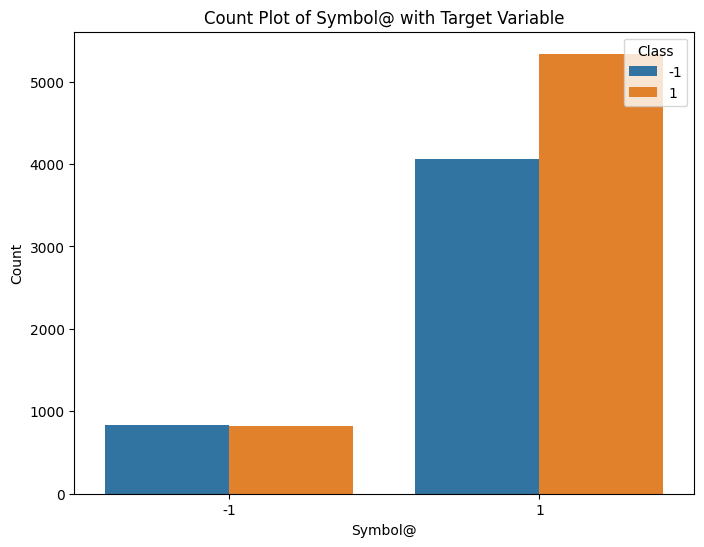

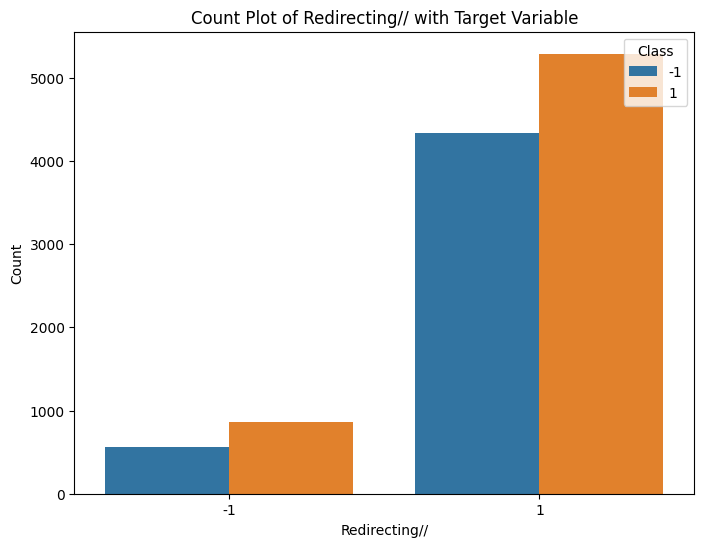

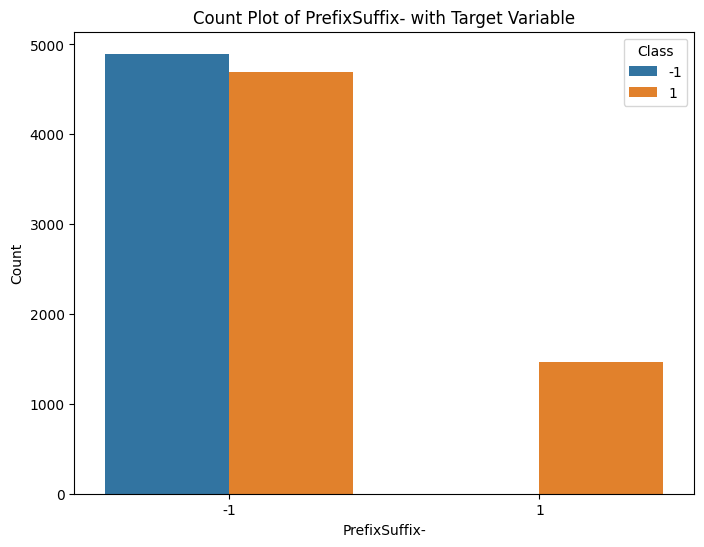

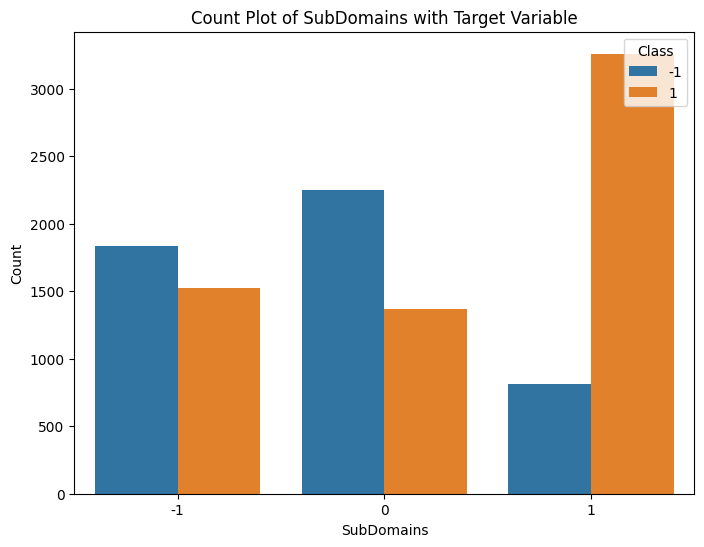

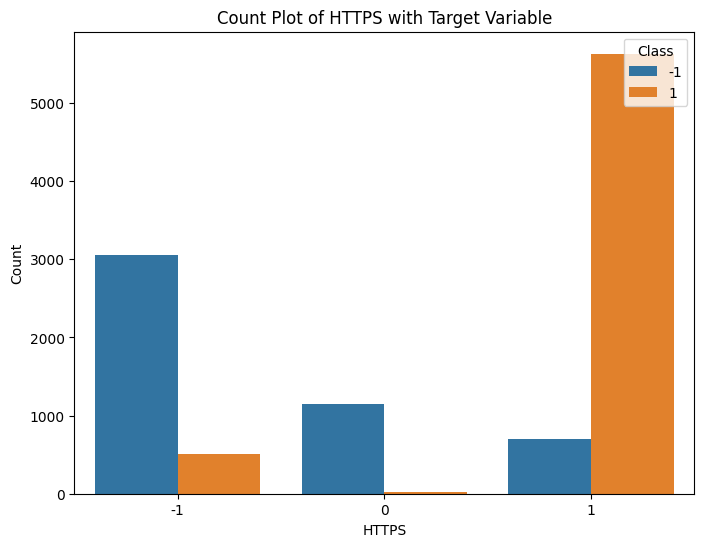

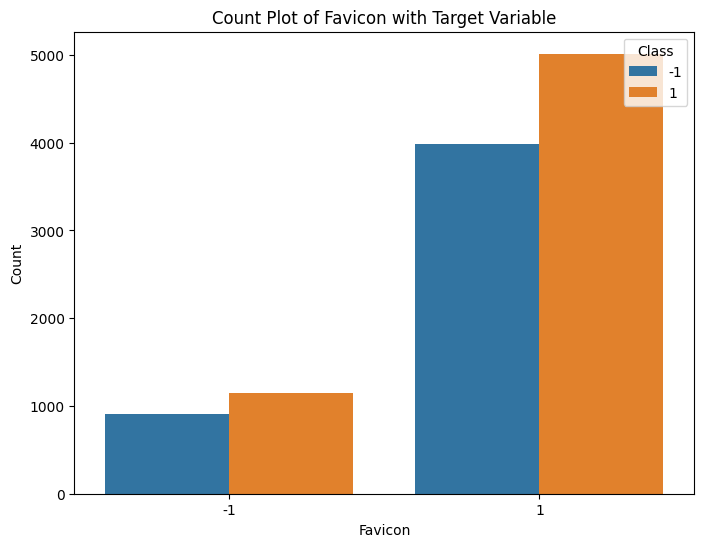

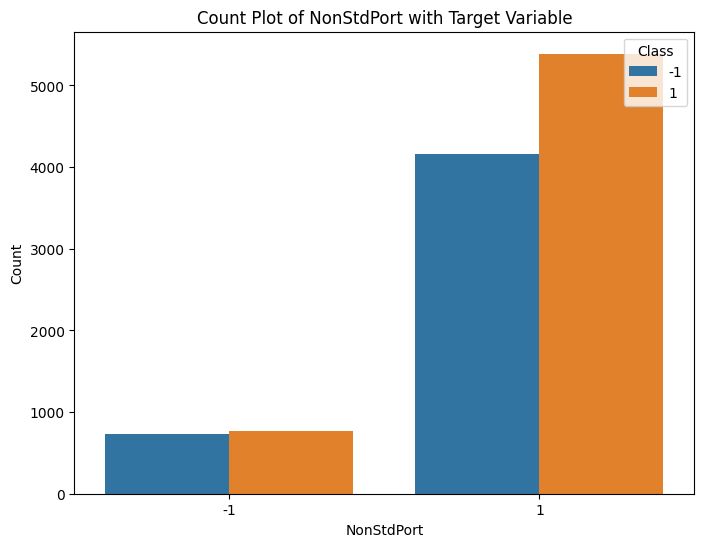

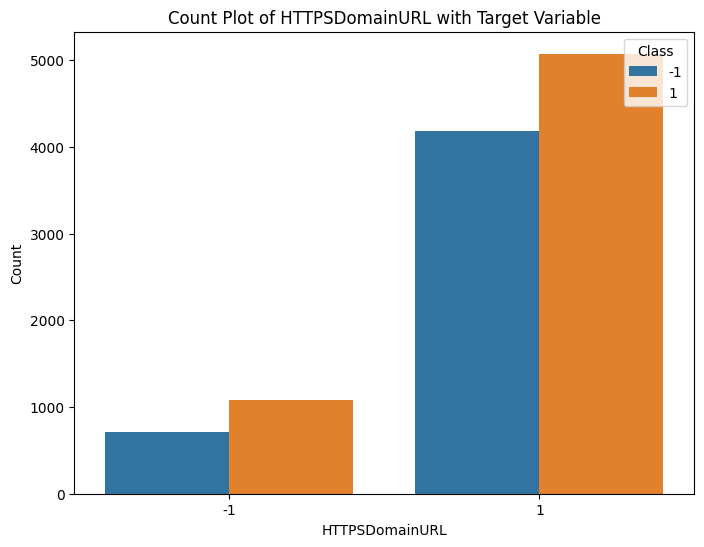

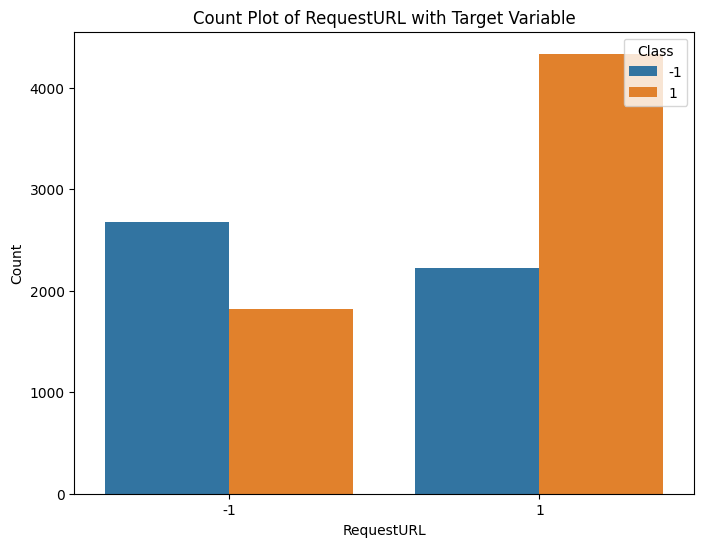

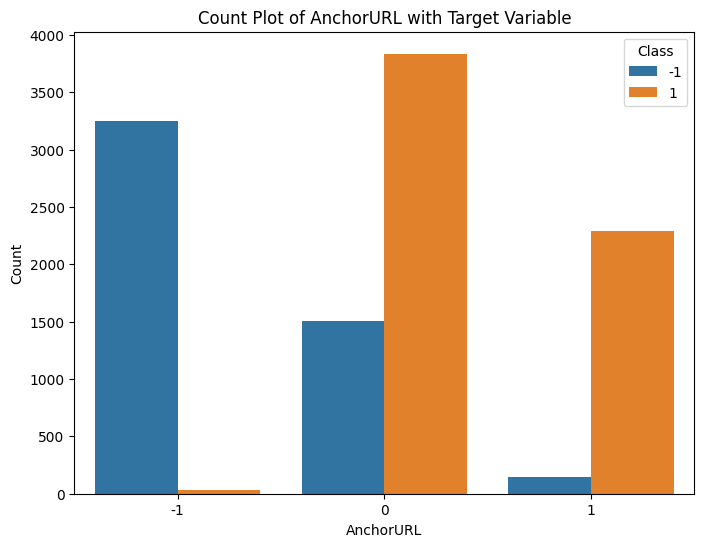

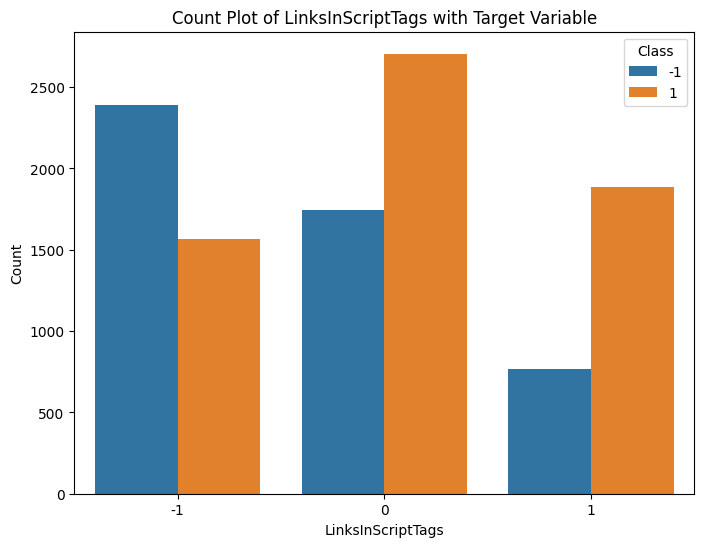

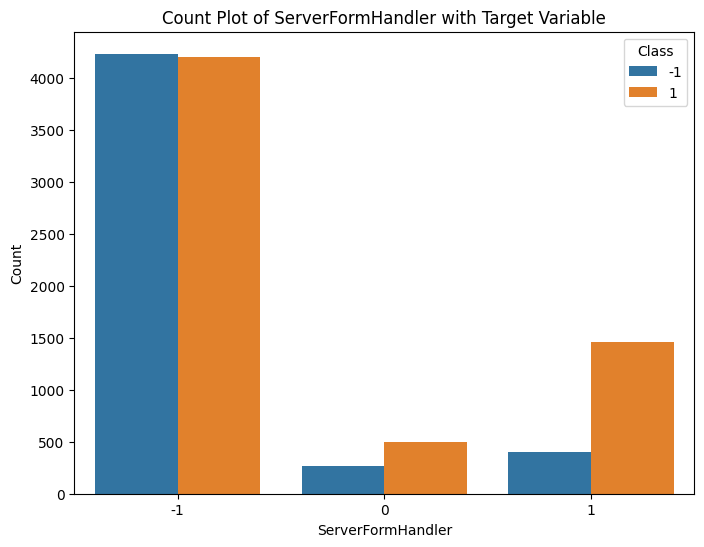

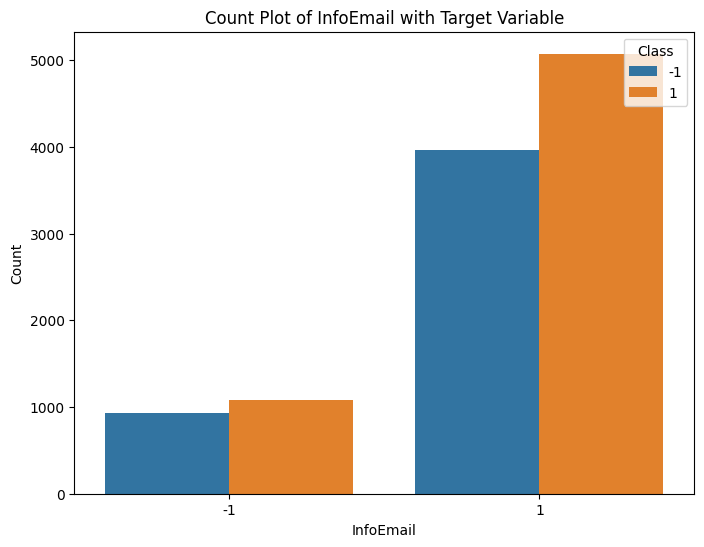

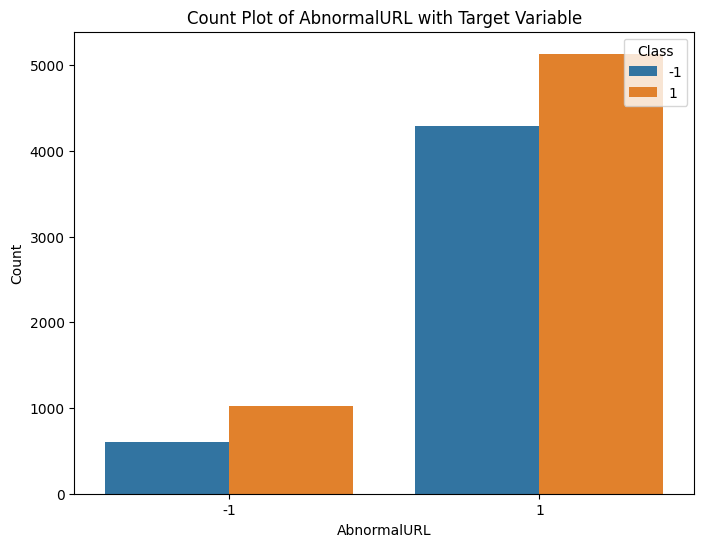

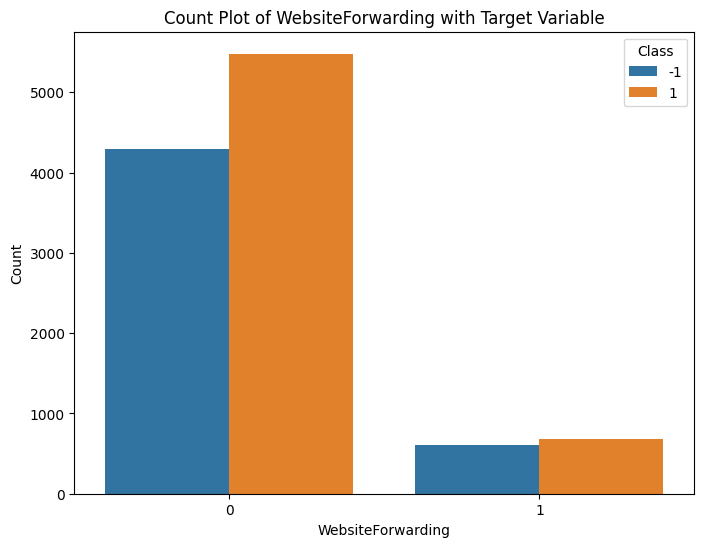

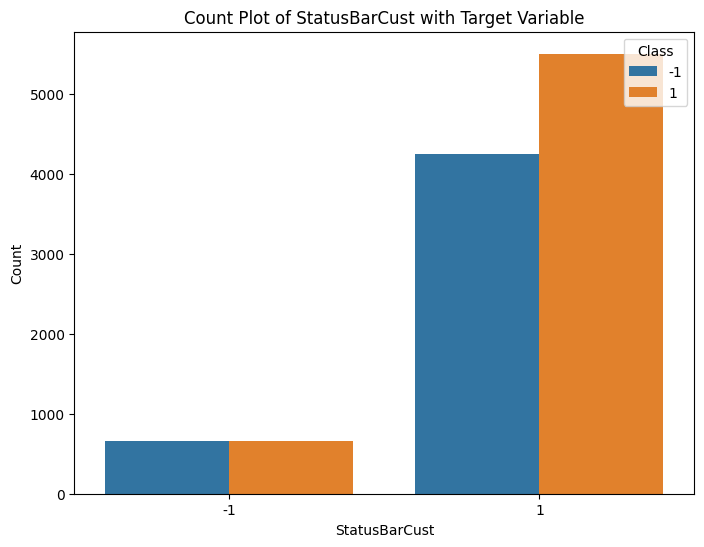

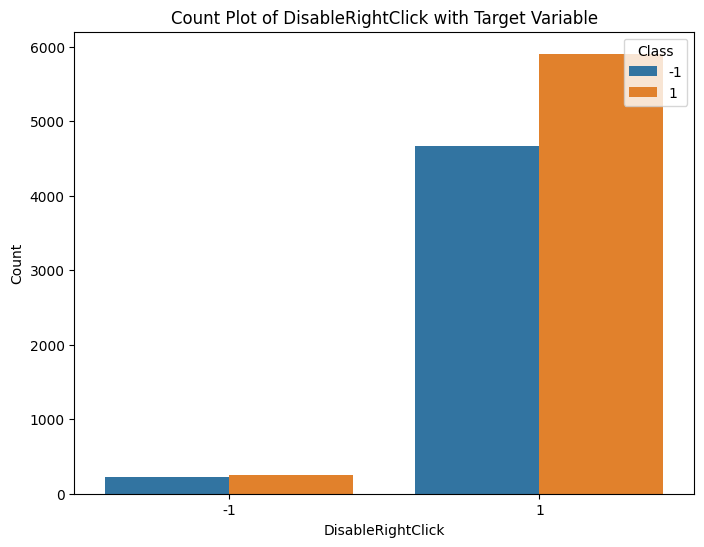

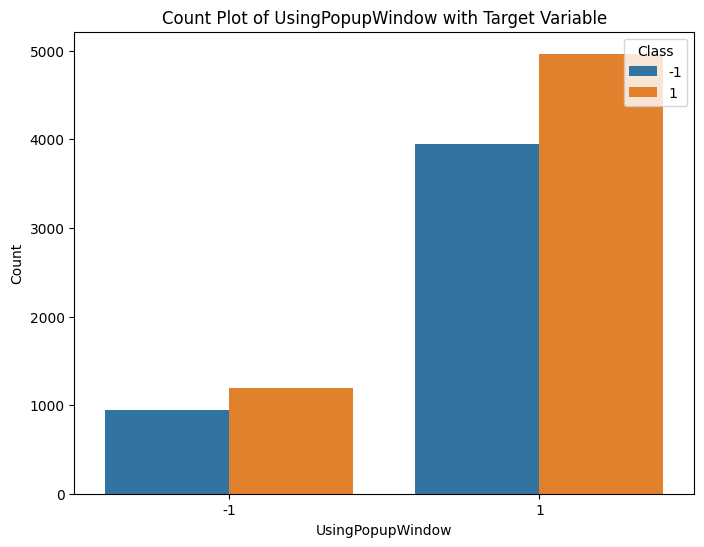

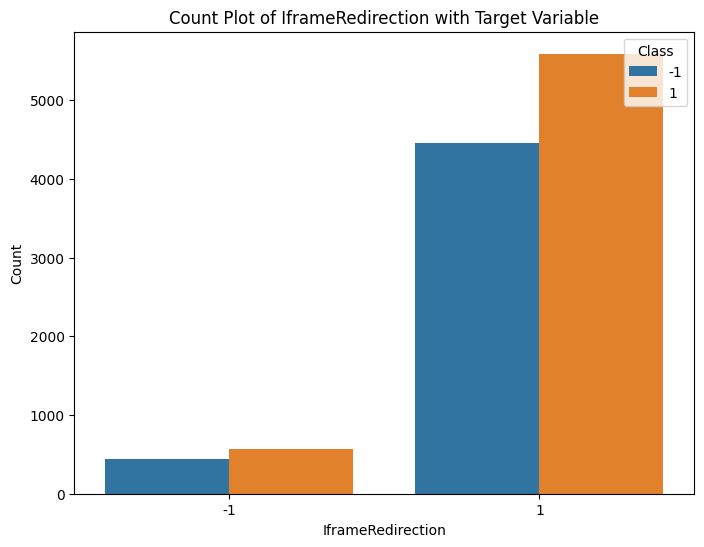

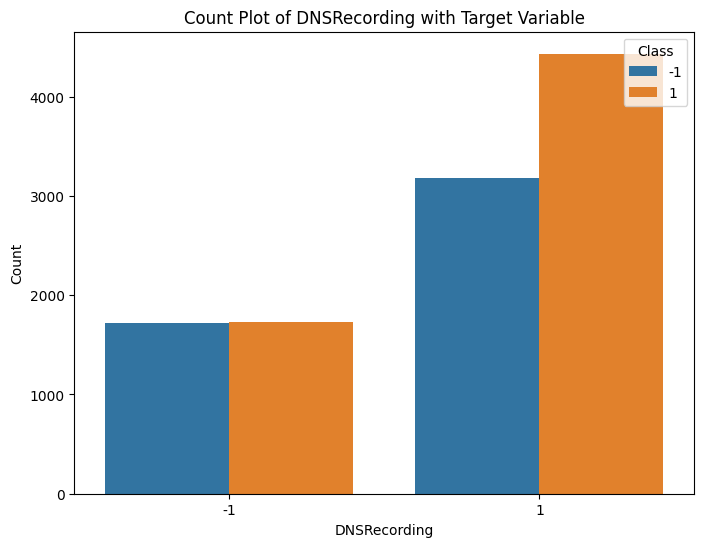

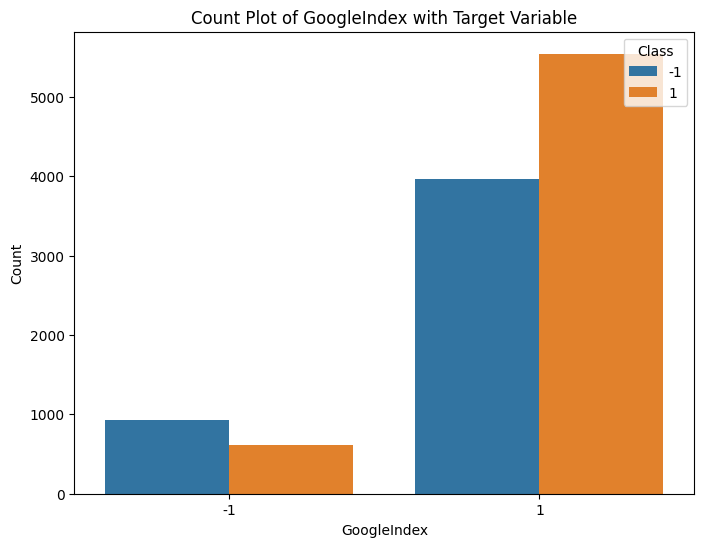

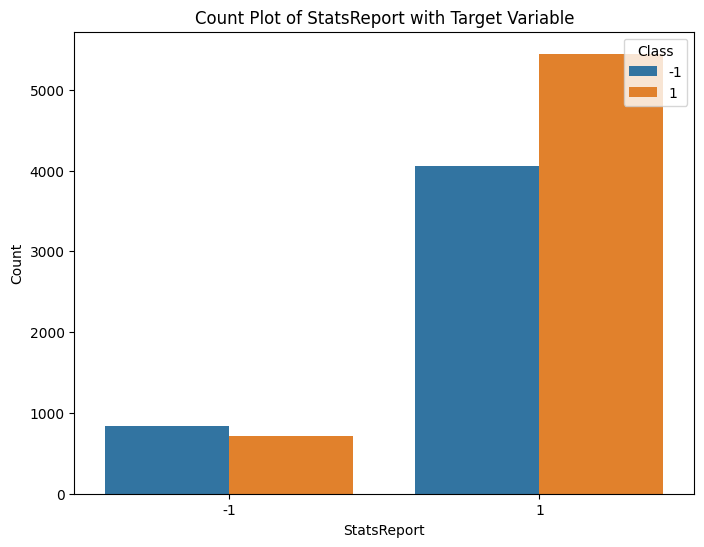

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 
                        'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 
                        'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'DNSRecording', 'GoogleIndex', 'StatsReport']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='class')
    plt.title(f'Count Plot of {feature} with Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class', loc='upper right')
    plt.show()


**Symbol@:**

* Phishing websites tend to have a higher occurrence of the symbol '@' in their URLs compared to legitimate websites.
* The count of '@' symbols is noticeably higher in phishing websites compared to legitimate ones.

**Redirecting//:**
* Phishing websites are more likely to use multiple consecutive forward slashes ('//') in their URLs compared to legitimate websites.
* The count of multiple consecutive forward slashes is higher in phishing websites compared to legitimate ones.

**PrefixSuffix-:** 
* Phishing websites tend to have prefixes or suffixes in their domain names, which may be uncommon or suspicious.
* The presence of prefixes or suffixes in domain names is more common in phishing websites compared to legitimate ones.

**SubDomains:**
* Phishing websites may have a higher number of subdomains compared to legitimate websites, possibly indicating a complex URL structure.
* The count of subdomains is higher in phishing websites compared to legitimate ones.

**HTTPS:**
* Legitimate websites are more likely to have HTTPS protocol enabled for secure communication compared to phishing websites.
* The count of HTTPS-enabled websites is higher in legitimate websites compared to phishing ones.

**Favicon:**
* The presence or absence of a favicon (icon displayed in the browser tab) may not be a distinguishing factor between phishing and legitimate websites.
* The count of websites with or without a favicon is similar across both phishing and legitimate categories.

**NonStdPort:**
* Phishing websites may use non-standard ports for communication, which can be indicative of suspicious activity.
* The count of non-standard port usage is higher in phishing websites compared to legitimate ones.

**HTTPSDomainURL:**
* Phishing websites may mimic the appearance of HTTPS URLs even though they do not actually use HTTPS protocol.
* The count of HTTPSDomainURL is higher in phishing websites compared to legitimate ones.

## **Bivariate Analysis**

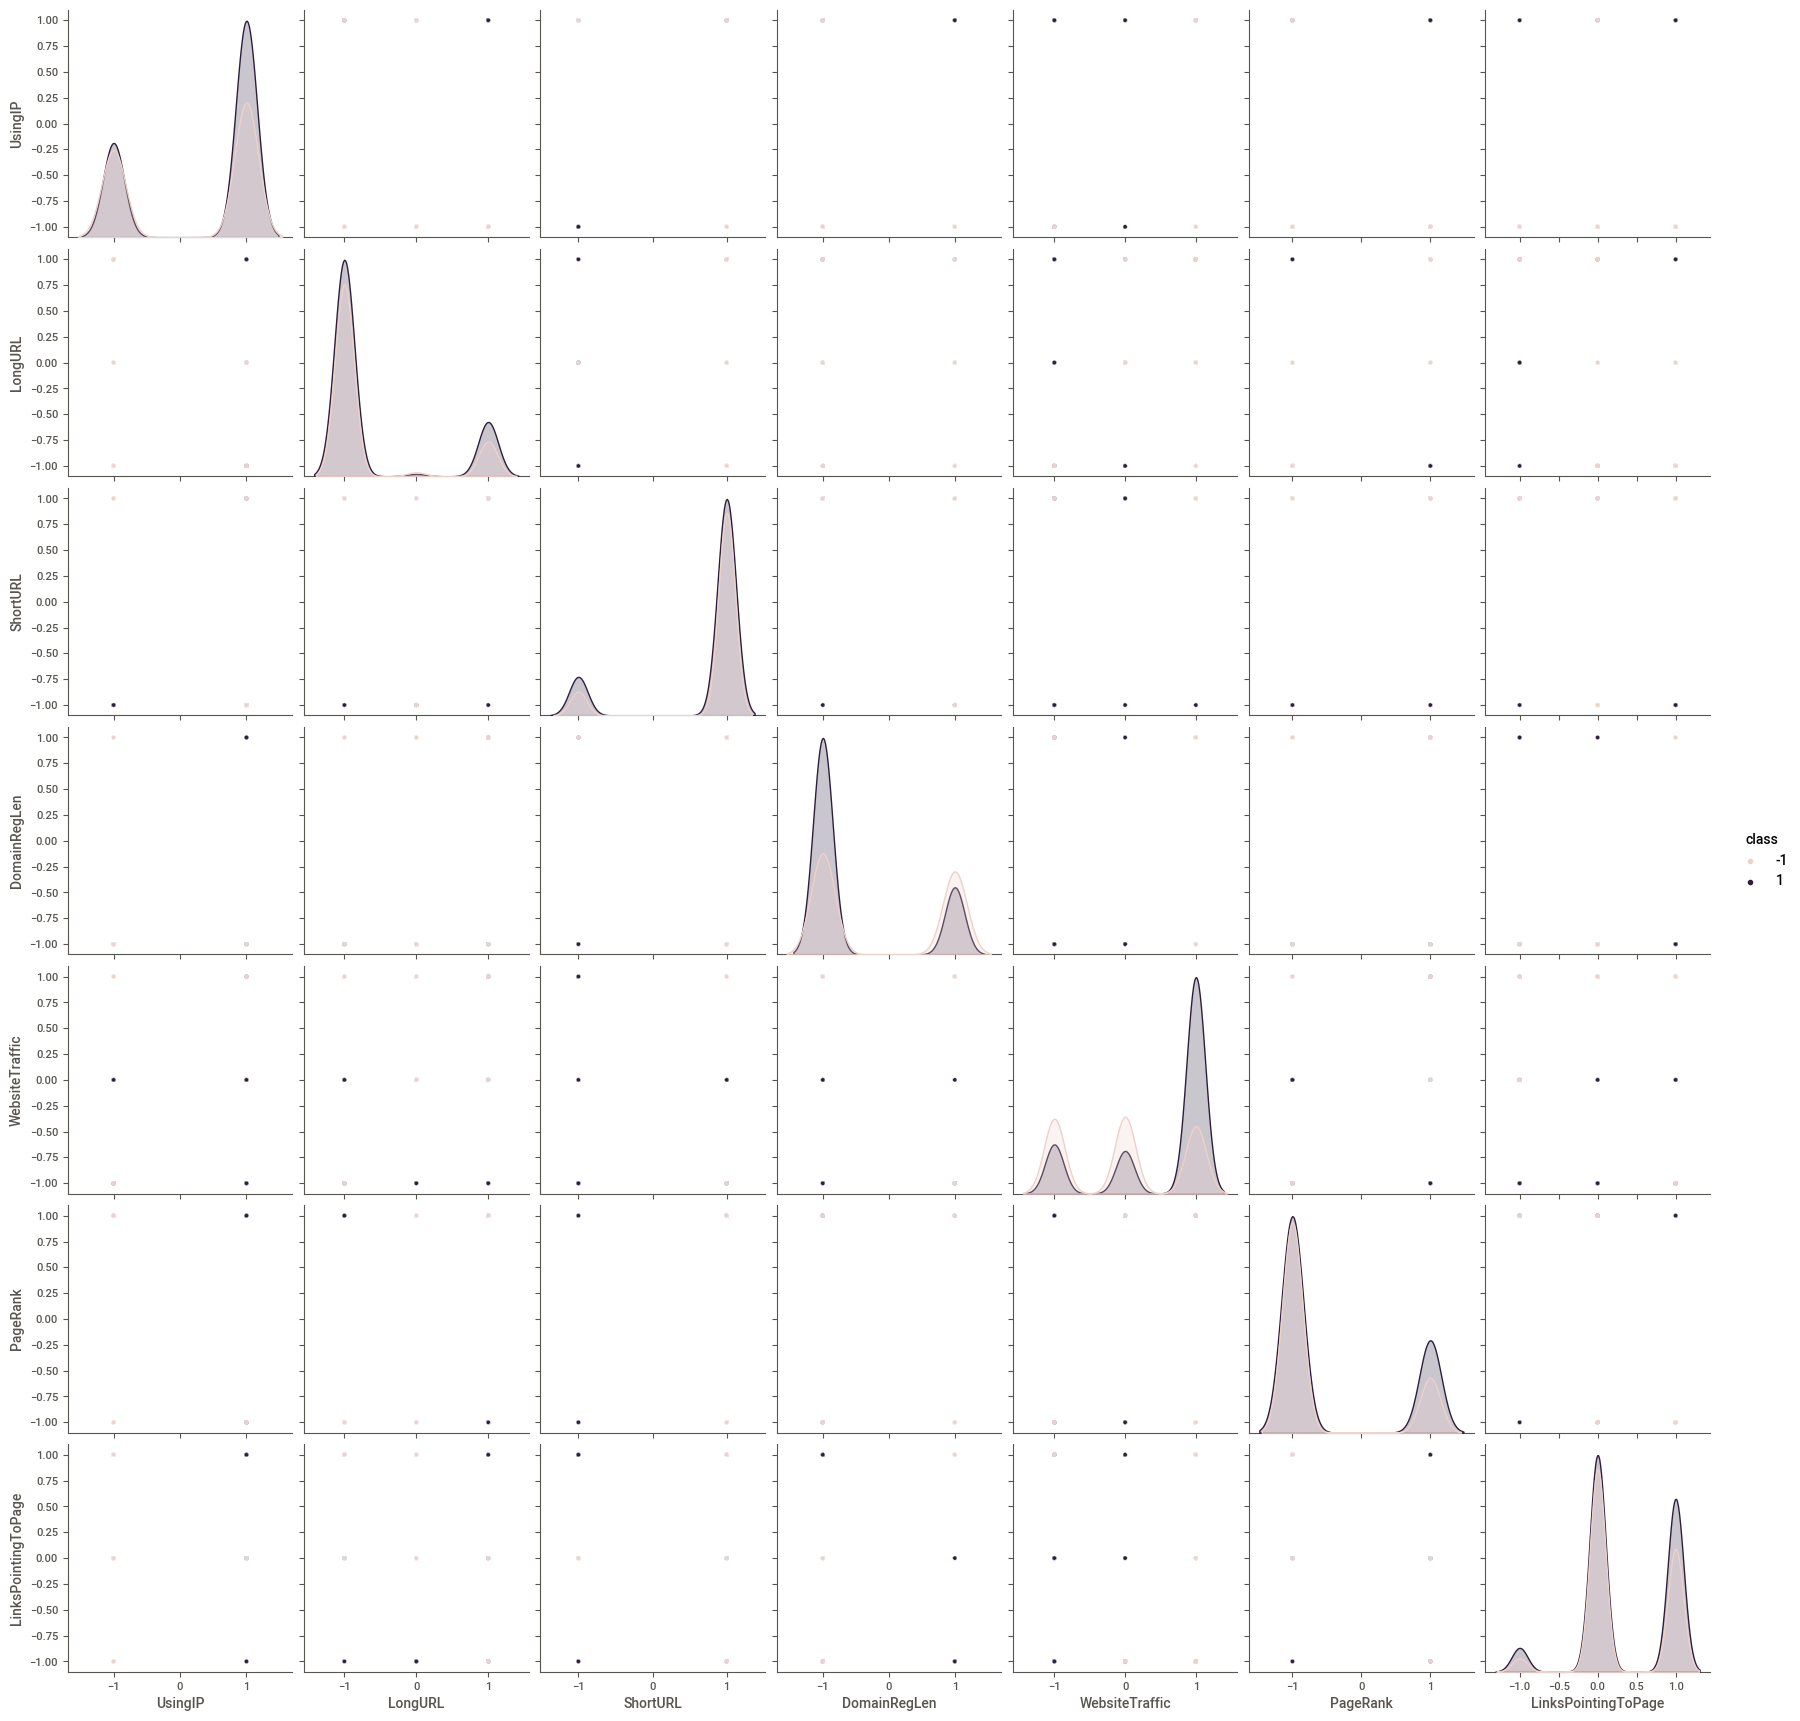

In [25]:
# Bivariate Analysis

# Pair plots for numerical features
sns.pairplot(data=data, vars=numerical_features, hue='class', diag_kind='kde')
plt.show()


**UsingIP vs. LongURL:**

* Phishing websites (represented by orange points) and legitimate websites (represented by blue points) exhibit overlapping distributions.
* There seems to be no clear separation between phishing and legitimate websites based on these two features alone.

**UsingIP vs. ShortURL:**

* Similar to the previous pair plot, there is considerable overlap between phishing and legitimate websites.
* It's challenging to distinguish between the two classes based solely on the values of these two features.

**UsingIP vs. DomainRegLen:**

* The distributions of phishing and legitimate websites show some separation, particularly for longer domain registration lengths.
* Phishing websites tend to have shorter domain registration lengths compared to legitimate ones, although there is still some overlap.

**LongURL vs. ShortURL:**

* The scatterplot shows no clear pattern or separation between phishing and legitimate websites.
* Both classes exhibit a wide range of values for both long and short URL lengths.

**LongURL vs. DomainRegLen:**

* There appears to be a weak positive correlation between long URL lengths and domain registration lengths.
*  However, there is significant overlap between phishing and legitimate websites, making it difficult to distinguish between the two based solely on these features.

**ShortURL vs. DomainRegLen:**

* Similar to the previous pair plot, there is a weak positive correlation between short URL lengths and domain registration lengths.
* The separation between phishing and legitimate websites is not clear, with considerable overlap between the two classes.


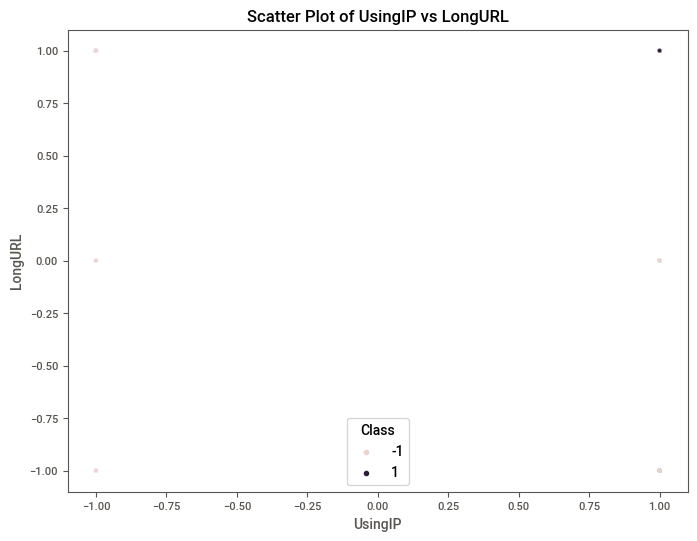

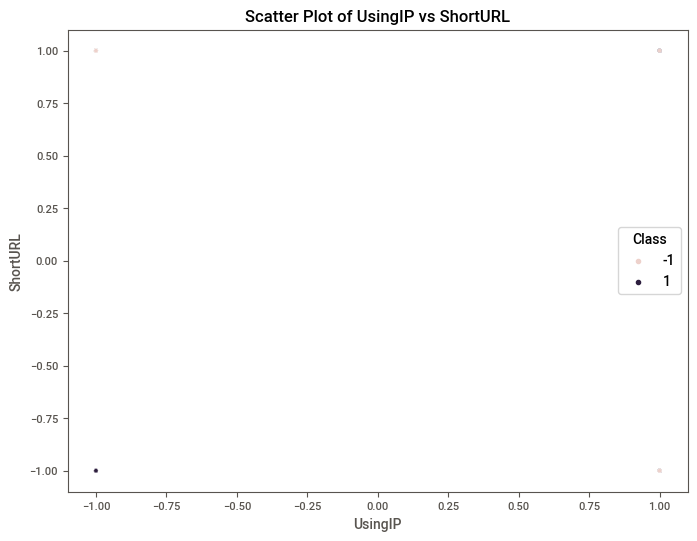

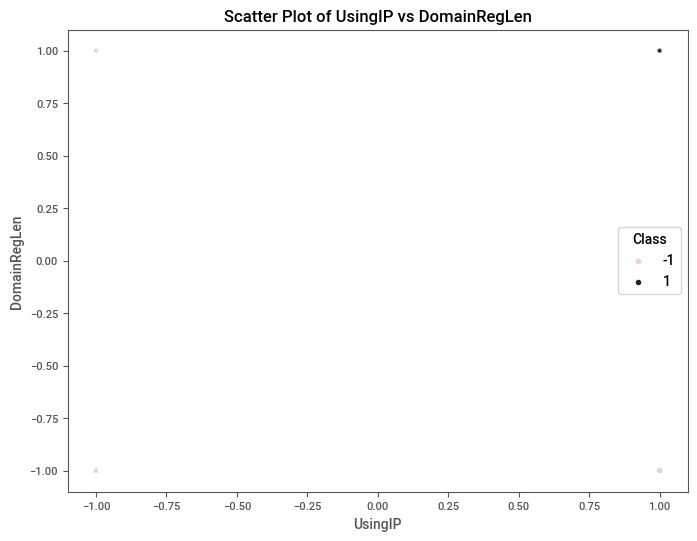

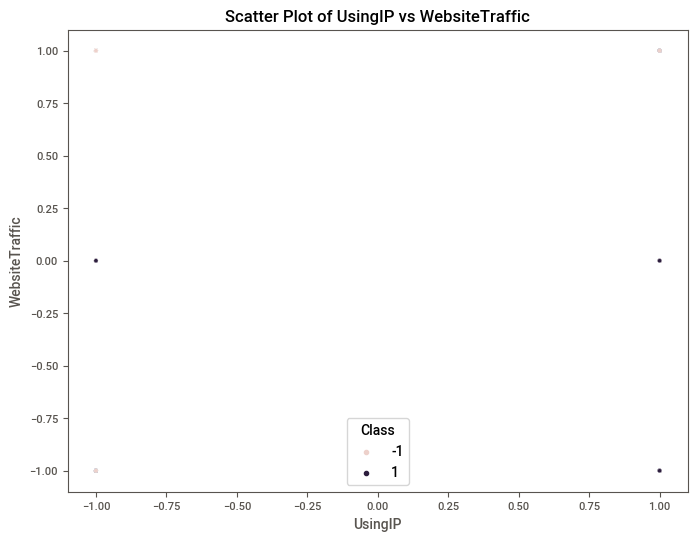

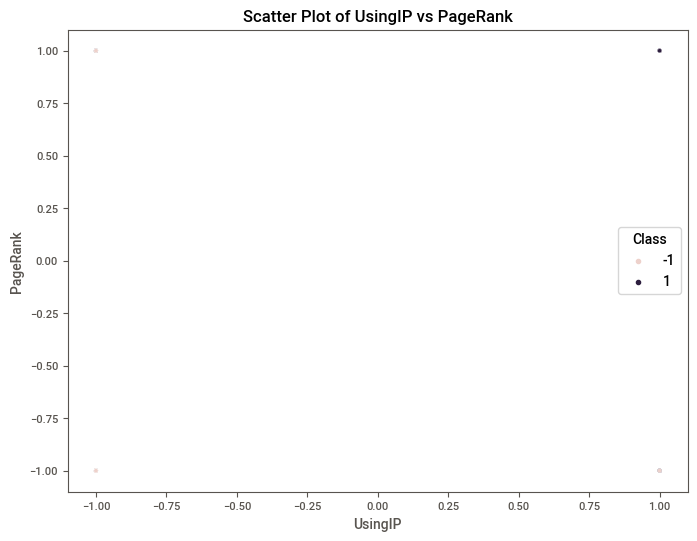

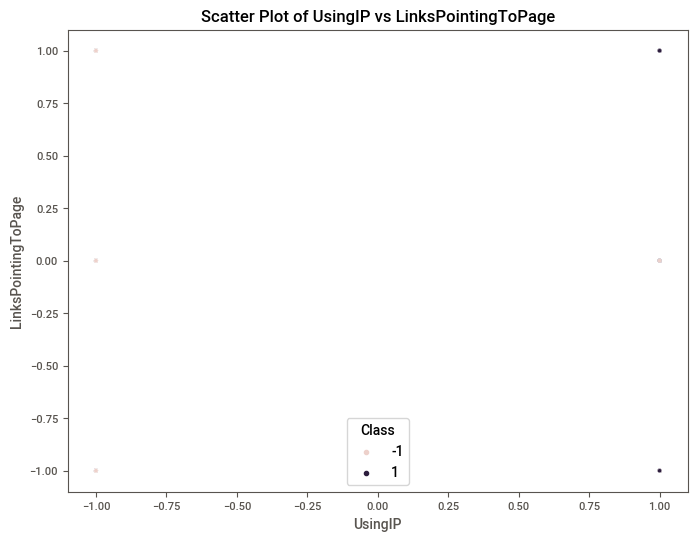

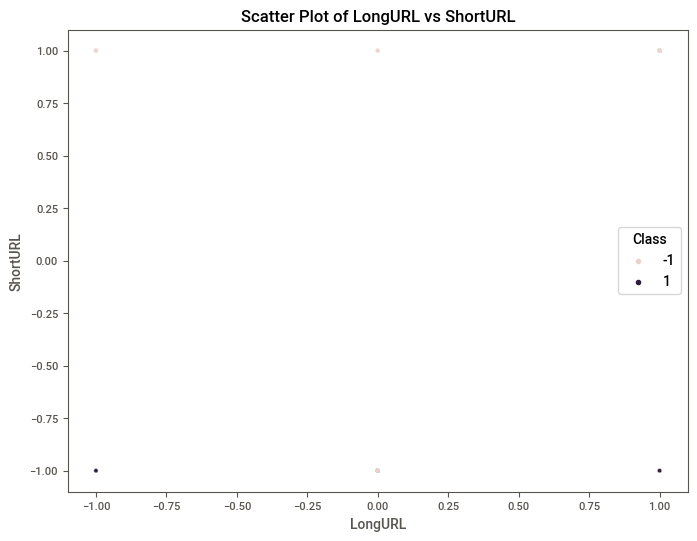

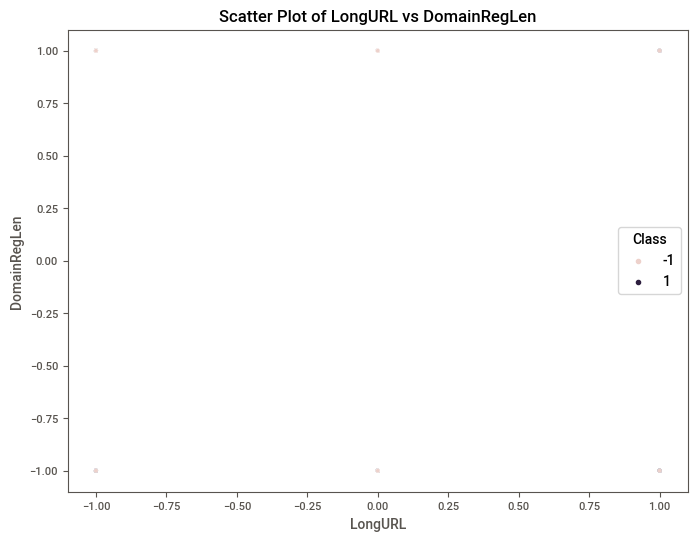

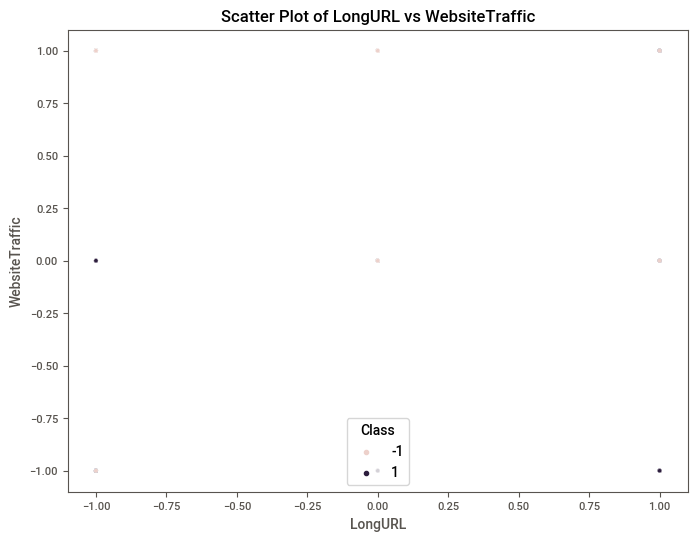

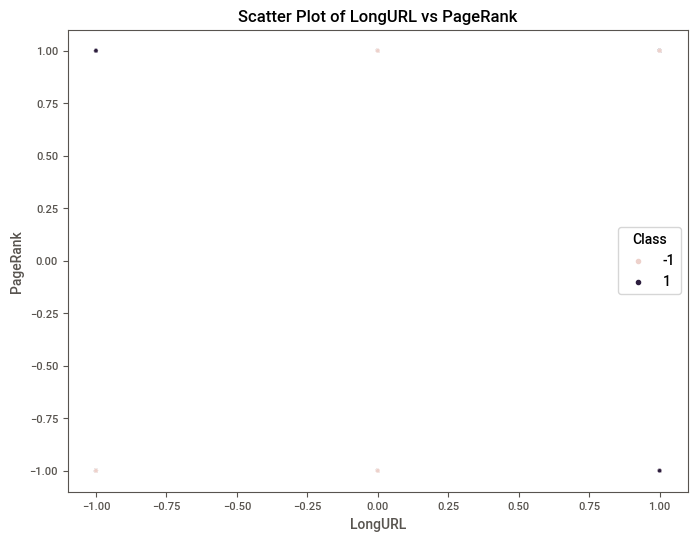

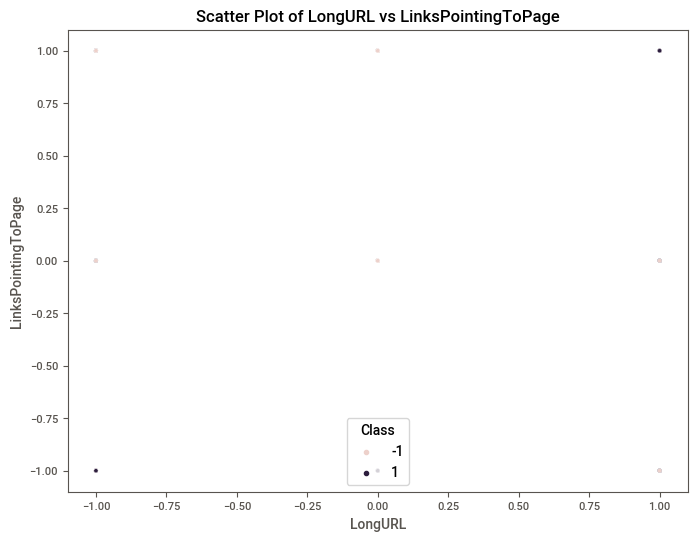

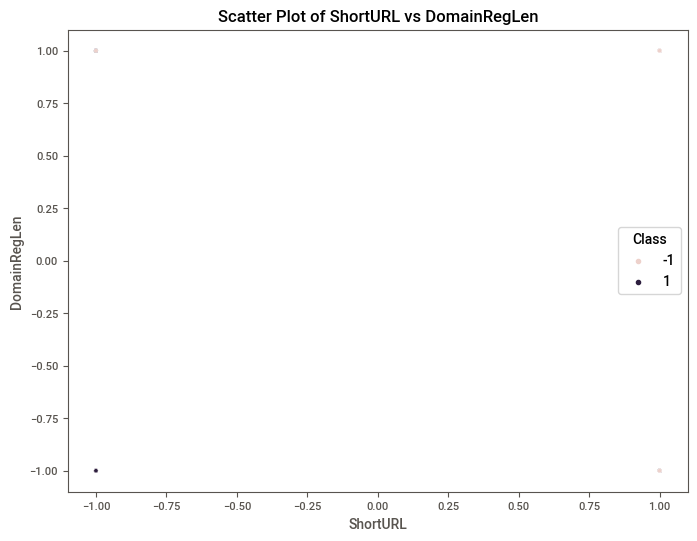

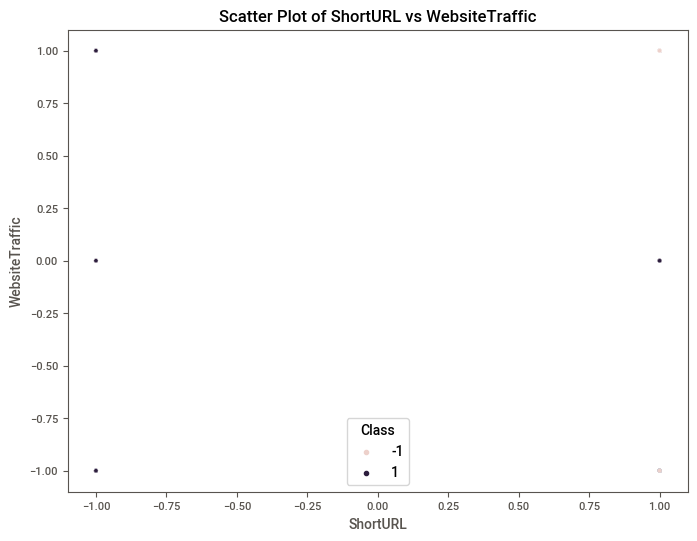

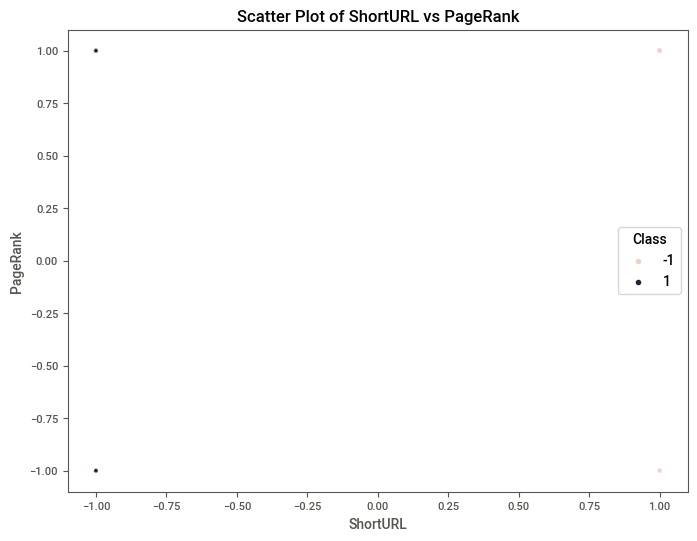

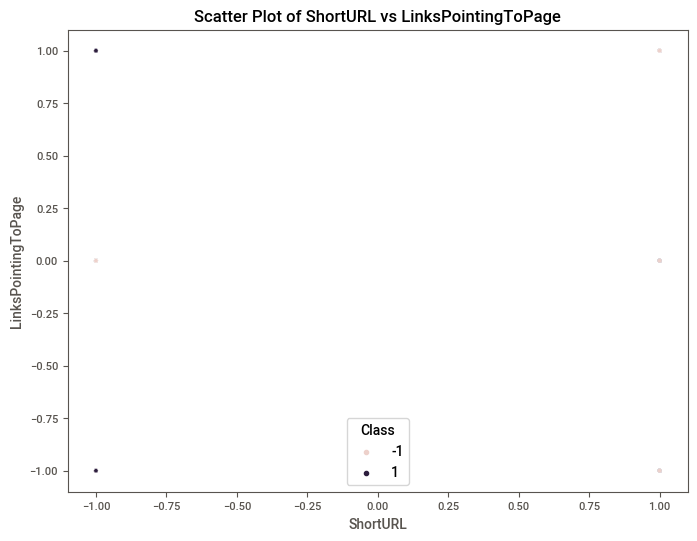

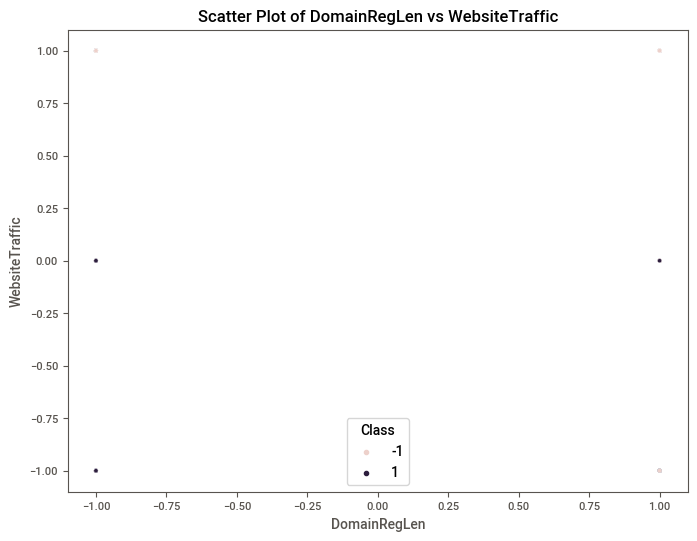

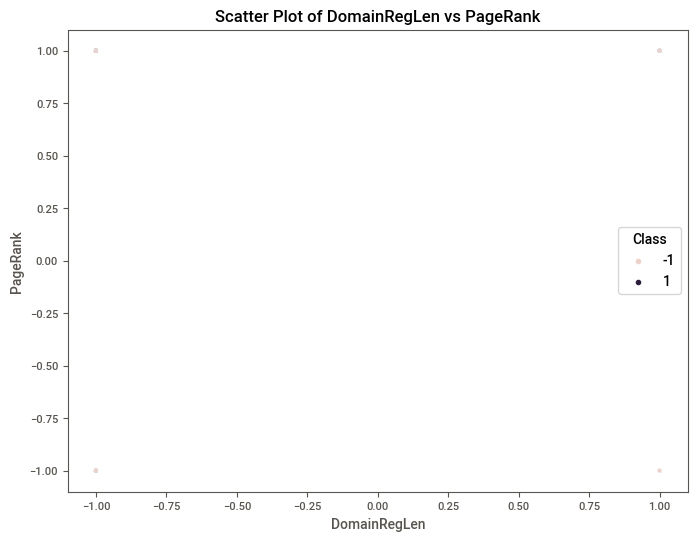

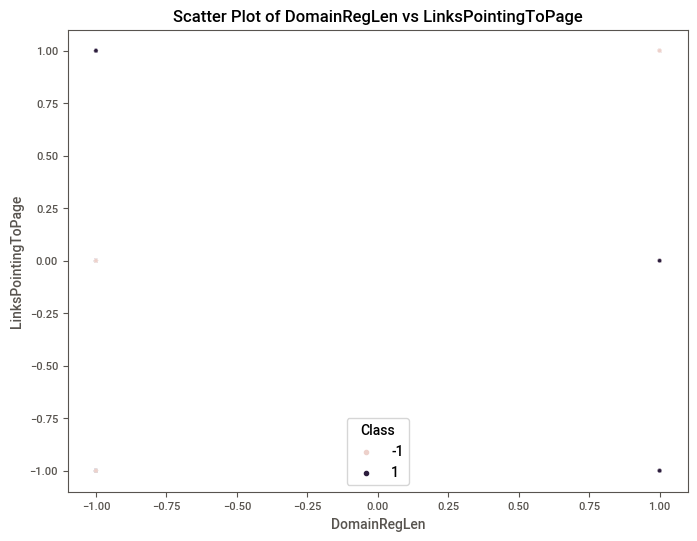

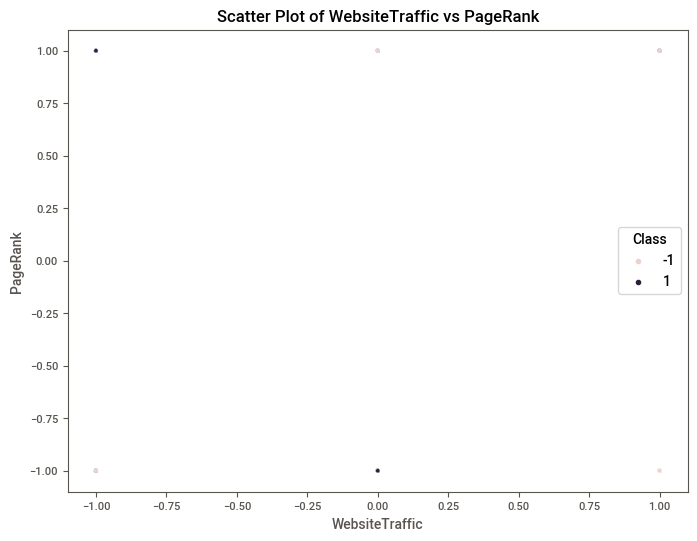

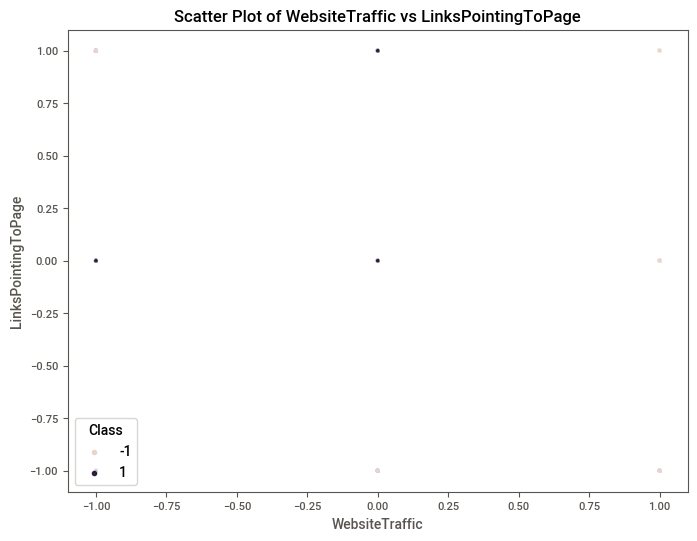

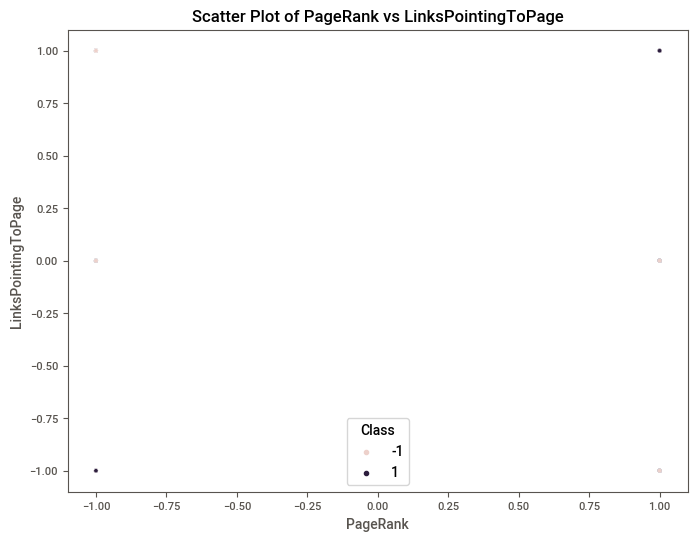

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['UsingIP', 'LongURL', 'ShortURL', 'DomainRegLen', 'WebsiteTraffic', 'PageRank', 'LinksPointingToPage']

# Scatter plots for each pair of numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=numerical_features[i], y=numerical_features[j], hue='class')
        plt.title(f'Scatter Plot of {numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.legend(title='Class')
        plt.show()


**UsingIP vs. LongURL:**

* No clear pattern or correlation between the frequency of using IP addresses (UsingIP) and the length of the URL (LongURL).
* Both phishing and legitimate websites exhibit a wide range of values for both features, with significant overlap between the two classes.

**UsingIP vs. ShortURL:**

* Similar to the previous scatter plot, there is no evident relationship between the frequency of using IP addresses and the length of the shortened URL.
* The distribution of points for both classes is scattered across the plot, indicating no strong correlation.

**UsingIP vs. DomainRegLen:**

* No significant relationship between the frequency of using IP addresses and the length of the domain registration (DomainRegLen).
* Both phishing and legitimate websites show a range of domain registration lengths, with no clear distinction between the two classes.

**LongURL vs. ShortURL:**

* The length of the long URL (LongURL) and the length of the shortened URL (ShortURL) exhibit a positive correlation.
* Longer long URLs tend to have longer shortened versions, and vice versa.
* However, there is considerable overlap between phishing and legitimate websites, making it challenging to differentiate based solely on these features.

**LongURL vs. DomainRegLen:**

* No apparent relationship between the length of the long URL and the domain registration length.
* Both phishing and legitimate websites show a wide range of values for both features, with no clear separation between the two classes.

**ShortURL vs. DomainRegLen:**

* Similar to the previous scatter plot, there is no discernible correlation between the length of the shortened URL and the domain registration length.
* Phishing and legitimate websites exhibit a range of values for both features, with significant overlap between the two classes.

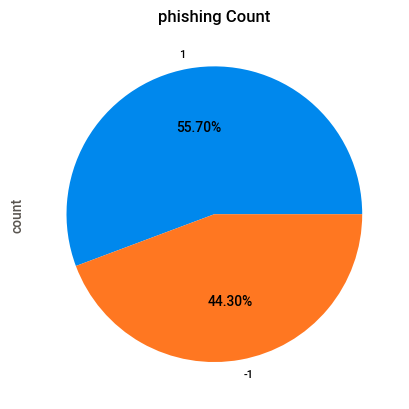

In [27]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("phishing Count")
plt.show()

In [28]:
#Dropping the Domain column
data = data.drop(['Index'], axis = 1).copy()
     

## **Multivariate Analysis**

In [31]:
!pip install autoviz

In [30]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported v0.1.807. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## **MODEL CREATION & EVALUATION**

### DEFINE INDEPENDENT AND DEPENDENT VARIABLE

In [35]:
# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # Select all columns except the last one as features
y = data['class']      # Select the last column as the target variable


In [36]:
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1


In [37]:
y.head()

0   -1
1   -1
2   -1
3    1
4    1
Name: class, dtype: int64

### **SPLIT TRAINING AND TESTING DATA**

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=35,test_size=0.20)

In [39]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({1: 6157, -1: 4897})
balanced data:    : Counter({-1: 6157, 1: 6157})


## **MODEL BUILDING**

### **1. SUPPORT VECTOR CLASSIFIER**

In [72]:
#importing packages
from sklearn.metrics import accuracy_score

In [73]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

In [74]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [75]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [76]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.927
SVM : Accuracy on test Data: 0.932


In [77]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [78]:
Scores_ml = {}
Scores_ml['SVM'] = np.round(svm.score(X_test,y_test),2)

In [81]:
print('Training Accuracy :',svm.score(X_train,y_train))
print('Testing Accuracy :',svm.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(svm.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(svm.predict(X_test), y_test,
                            target_names =['Bad','Good']))



Training Accuracy : 0.9273823884197828
Testing Accuracy : 0.9316208393632417

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.94      0.92      1173
        Good       0.95      0.93      0.94      1591

    accuracy                           0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



## **DECISION TREE**

In [82]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [83]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [84]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.922
Decision Tree: Accuracy on test Data: 0.925


In [86]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [87]:
Scores_ml = {}
Scores_ml['Decision Tree'] = np.round(tree.score(X_test,y_test),2)

In [88]:
print('Training Accuracy :',tree.score(X_train,y_train))
print('Testing Accuracy :',tree.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(tree.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(tree.predict(X_test), y_test,
                            target_names =['Bad','Good']))


Training Accuracy : 0.9218335343787696
Testing Accuracy : 0.9251085383502171

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.86      0.96      0.91      1085
        Good       0.98      0.90      0.94      1679

    accuracy                           0.93      2764
   macro avg       0.92      0.93      0.92      2764
weighted avg       0.93      0.93      0.93      2764



## **RANDOM FOREST**

In [89]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [90]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [91]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.932
Random forest: Accuracy on test Data: 0.934


In [92]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [93]:
Scores_ml = {}
Scores_ml['Random Forest'] = np.round(forest.score(X_test,y_test),2)

In [94]:
print('Training Accuracy :',forest.score(X_train,y_train))
print('Testing Accuracy :',forest.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(forest.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest.predict(X_test), y_test,
                            target_names =['Bad','Good']))

Training Accuracy : 0.9317249698431845
Testing Accuracy : 0.9337916063675832

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.95      0.92      1147
        Good       0.96      0.92      0.94      1617

    accuracy                           0.93      2764
   macro avg       0.93      0.94      0.93      2764
weighted avg       0.94      0.93      0.93      2764



In [95]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,SVM,0.927,0.932
1,Decision Tree,0.922,0.925
2,Random Forest,0.932,0.934


In [96]:
# save XGBoost model to file
import pickle
pickle.dump(forest, open("Random Forest.pkl", "wb"))

In [98]:
# load model from file
loaded_model = pickle.load(open("Random Forest.pkl", "rb"))

In [99]:
result = loaded_model.score(X_train, y_train)
print(result)

0.9317249698431845


In [100]:
predict_phish = [[-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1]]
predict_legitimate = [[1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1]]
loaded_model = pickle.load(open('Random Forest.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_phish)
result2 = loaded_model.predict(predict_legitimate)
print(result)
if(result==1):
    print("THIS WEBSITE IS A LEGITIMATE WEBSITE.")
else:
    print("THIS WEBSITE IS A PHISHING WEBSITE.")
print("*"*30)
print(result2)
if (result2 ==1):
  print('THIS WEBSITE IS A LEGITIMATE WEBSITE.')
else:
  print('THIS WEBSITE IS A PHISHING WEBSITE.')

[-1]
THIS WEBSITE IS A PHISHING WEBSITE.
******************************
[1]
THIS WEBSITE IS A LEGITIMATE WEBSITE.
